# pandas的使用实训4

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']

In [131]:
data=pd.read_excel("./tips.xls")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### （1）查看数据描述信息

In [132]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### （2）修改列名为汉字，并显示前五行

In [133]:
data.columns=["账单总额","小费","性别","是否抽烟","星期","三餐","大小"]
data.head()

,账单总额,小费,性别,是否抽烟,星期,三餐,大小
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### （3）分析小费金额和总金额的关系（散点图）

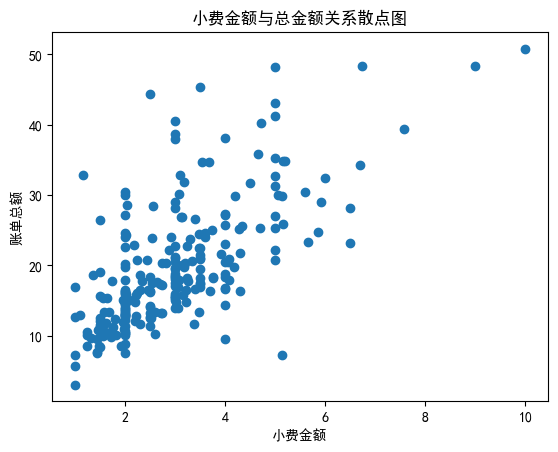

In [134]:
plt.scatter(data["小费"],data["账单总额"])
plt.xlabel("小费金额")
plt.ylabel("账单总额")
plt.title("小费金额与总金额关系散点图")
plt.show()

观察图片可知，小费金额与账单总额有较为强烈额线性关系，小费金额越高则账单总额也越大，  
同时可以观察到小费金额大部分聚集在2-4之间，账单总额则大部分聚集在10-20之间

### （4）分析男性顾客和女性顾客谁更慷慨（柱状图）

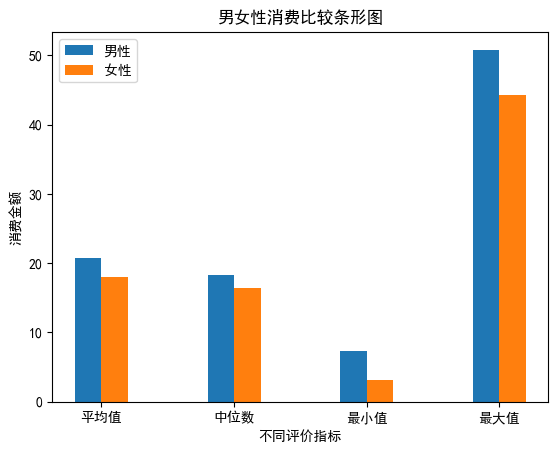

In [135]:
man=data[data["性别"]=="Male"]["账单总额"]
women=data[data["性别"]=="Female"]["账单总额"]

x=np.arange(4)

plt.bar(x,[man.mean(),man.median(),man.min(),man.max()],width=0.2,label="男性")
plt.bar(x+0.2,[women.mean(),women.median(),women.min(),women.max()],width=0.2,label="女性")
plt.xticks(x+0.1,labels=["平均值","中位数","最小值","最大值"])
plt.title("男女性消费比较条形图")
plt.xlabel("不同评价指标")
plt.ylabel("消费金额")

plt.legend()
plt.show()

观察条形图可知，从均值，中位数，最小最大值的情况比较来看，男性会比女性慷慨一点
### （5）分析日期和小费之间的关系

[  0.     0.     0.   171.83  51.96 260.4  247.39]
[0.         0.         0.         2.77145161 2.73473684 2.99310345
 3.25513158]


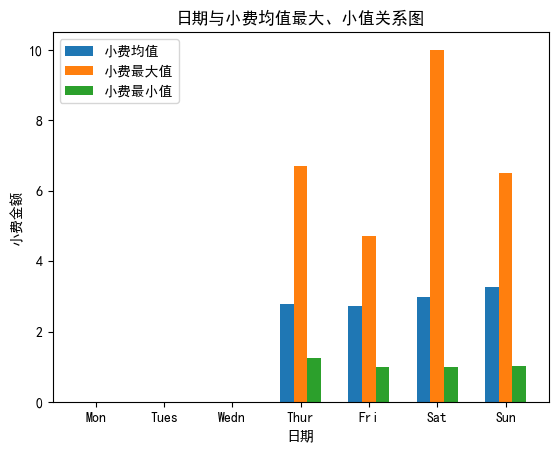

In [136]:
date=["Mon","Tues","Wedn","Thur","Fri","Sat","Sun"]
tips=[]

for key in date:
    tips.append(data[data["星期"]==key]["小费"])

tips_mean=[]
for oneDay in tips:
    tips_mean.append(pd.DataFrame(oneDay).mean())
tips_mean=pd.DataFrame(tips_mean).fillna(0)

tips_max=[]
for oneDay in tips:
    tips_max.append(pd.DataFrame(oneDay).max())
tips_max=pd.DataFrame(tips_max).fillna(0)

tips_min=[]
for oneDay in tips:
    tips_min.append(pd.DataFrame(oneDay).min())
tips_min=pd.DataFrame(tips_min).fillna(0)
  
tips_sum=pd.DataFrame(tips).sum(1)

x=np.arange(7)
# pd.DataFrame(tips_mean)
# print(np.array(tips_sum),pd.DataFrame(tips_mean).fillna(0))

print(np.array(tips_sum))
print(np.array(tips_mean).reshape(-1,))

# plt.bar(x,np.array(tips_sum),width=0.2,label="小费和")
plt.bar(x,np.array(tips_mean).reshape(-1,),width=0.2,label="小费均值")
plt.bar(x+0.2,np.array(tips_max).reshape(-1,),width=0.2,label="小费最大值")
plt.bar(x+0.4,np.array(tips_min).reshape(-1,),width=0.2,label="小费最小值")

plt.xticks(x+0.2,date)
plt.xlabel("日期")
plt.ylabel("小费金额")
plt.title("日期与小费均值最大、小值关系图")

plt.legend()


观察柱状图可知，给消费一般出现在每周的后四天，且随着周末的临近，消费给的金额均值也在变高
### （6）	性别+抽烟的组合因素对慷慨度的影响：（柱状图）

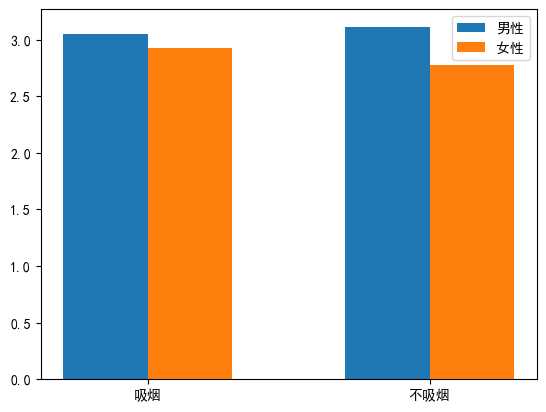

In [137]:

smoke=data[data["是否抽烟"]=="Yes"]
no_smoke=data[data["是否抽烟"]=="No"]

man_smoke=smoke[smoke["性别"]=="Male"]["小费"].mean()
woman_smoke=smoke[smoke["性别"]=="Female"]["小费"].mean()

man_no_smoke=no_smoke[no_smoke["性别"]=="Male"]["小费"].mean()
woman_no_smoke=no_smoke[no_smoke["性别"]=="Female"]["小费"].mean()

x=np.arange(2)
plt.bar(x,[man_smoke,man_no_smoke],width=0.3,label="男性")
plt.bar(x+0.3,[woman_smoke,woman_no_smoke],width=0.3,label="女性")

plt.xticks(x+0.15,["吸烟","不吸烟"])

plt.legend()

观察图像可知，通过是否吸烟以及男女的比较，男性不吸烟的会比吸烟的慷慨，女性吸烟的会比不吸烟的慷慨
### （7）分析聚餐时间段与小费数额的关系

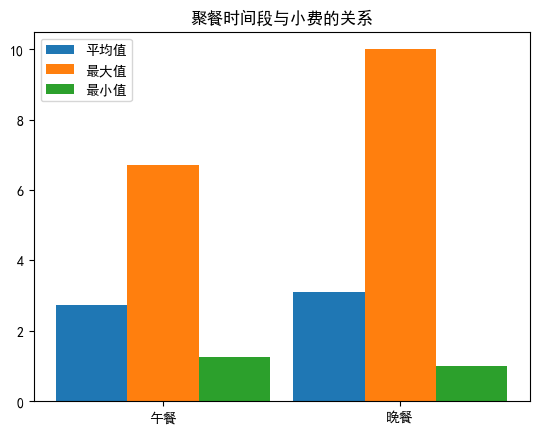

In [138]:
lunch=data[data["三餐"]=="Lunch"]['小费']
dinner=data[data["三餐"]=="Dinner"]["小费"]

x=np.arange(2)
plt.bar(x,[lunch.mean(),dinner.mean()],width=0.3,label="平均值")
plt.bar(x+0.3,[lunch.max(),dinner.max()],width=0.3,label="最大值")
plt.bar(x+0.6,[lunch.min(),dinner.min()],width=0.3,label="最小值")
plt.title("聚餐时间段与小费的关系")
dataTime=["午餐","晚餐"]
plt.xticks(x+0.3,dataTime)

plt.legend()

观察图像可知，晚餐的小费普遍会比午餐的要高
### （8）显示用餐时间time的不重复值

In [139]:
timeNoRepeat=data["三餐"]
print(timeNoRepeat.unique())

['Dinner' 'Lunch']


### （9）修改拼写错误的字段值
初始给的数据是完整的，因此首先导入老师后面发的有缺省的数据

In [140]:
data=pd.read_excel("./tips_mod.xls")
print(data.isnull().sum())
data.head()


tatal_bill    3
tip           3
sex           2
smoker        0
day           0
time          2
size          3
dtype: int64


,tatal_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [141]:
print(data["sex"].unique())
print(data["smoker"].unique())
print(data["day"].unique())
print(data["time"].unique())

['Female' 'Male' nan]
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Diner' 'Dier' 'Lunch' nan]


可以看出，time列中有拼写错误的情况，因此对拼写错误数据进行改正。

In [142]:
data.replace("Diner","Dinner",inplace=True)
data.replace("Dier","Dinner",inplace=True)
print(data["time"].unique())

['Dinner' 'Lunch' nan]


经过修改，数据拼写正确
### （10）检测数据中的缺失值

In [143]:
print(data.isnull().sum())

tatal_bill    3
tip           3
sex           2
smoker        0
day           0
time          2
size          3
dtype: int64


通过isnull函数可以看见各数据中的缺失值情况

### （11）删除一行内有两个缺失值的数据

In [144]:
rowDefault=data.isnull().sum(axis=1)
print("删除前",data.loc[rowDefault==2,:])
data.drop(data.loc[rowDefault==2,:].index,inplace=True)
print("删除后",data.loc[rowDefault==2,:])

删除前      tatal_bill   tip     sex smoker   day    time  size
238       35.83  4.67     NaN     No   Sat  Dinner   NaN
243       18.78   NaN  Female     No  Thur     NaN   2.0
删除后 Empty DataFrame
Columns: [tatal_bill, tip, sex, smoker, day, time, size]
Index: []


### （12）删除sex或time为空的行

In [145]:
rowDefault=data["sex"].isnull() | data["time"].isnull()
print("删除前",data.loc[rowDefault,:])
data.drop(data.loc[rowDefault].index,inplace=True)
print("删除后",data.loc[rowDefault,:])

删除前      tatal_bill   tip   sex smoker  day    time  size
236       12.60  1.00   NaN    Yes  Sat  Dinner   2.0
242       17.82  1.75  Male     No  Sat     NaN   2.0
删除后 Empty DataFrame
Columns: [tatal_bill, tip, sex, smoker, day, time, size]
Index: []


### （13）对剩余有空缺的数据用平均值替换

In [146]:
print("目前空缺情况",data.isnull().sum())
for column in list(data.columns[data.isnull().sum()>0]):
    mean_val=data[column].mean()
    data[column].fillna(mean_val,inplace=True)
print("填补后",data.isnull().sum())

目前空缺情况 tatal_bill    3
tip           2
sex           0
smoker        0
day           0
time          0
size          2
dtype: int64
填补后 tatal_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
